In [1]:
#!pip install numpy
#!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd   # data processing
from matplotlib import pyplot as plt

In [3]:
import sys
from google.colab import drive

In [4]:
drive.mount("/content/gdrive")

sys.path.insert(0,'/content/gdrive/My Drive/GWO/Model')
sys.path.insert(0,'/content/gdrive/My Drive/GWO/Model/Binary_MOGWO')
sys.path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/My Drive/GWO/Model/Binary_MOGWO',
 '/content/gdrive/My Drive/GWO/Model',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [5]:
inFile = "/content/gdrive/My Drive/GWO/Dataset/winequality-red.csv"
data = pd.read_csv(inFile)
data = data.rename(columns={"quality": "target"})
data.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  target
0               7.4             0.700         0.00  ...       0.56      9.4       5
1               7.8             0.880         0.00  ...       0.68      9.8       5
2               7.8             0.760         0.04  ...       0.65      9.8       5
3              11.2             0.280         0.56  ...       0.58      9.8       6
4               7.4             0.700         0.00  ...       0.56      9.4       5
...             ...               ...          ...  ...        ...      ...     ...
1594            6.2             0.600         0.08  ...       0.58     10.5       5
1595            5.9             0.550         0.10  ...       0.76     11.2       6
1596            6.3             0.510         0.13  ...       0.75     11.0       6
1597            5.9             0.645         0.12  ...       0.71     10.2       5
1598            6.0             0.310         

In [6]:
from BMOGWO import *
from ANN_Classifier_v2 import *

In [7]:
maxIter = 100

### Testing Binary GWO

In [8]:
def obj_fun(sel_features):
  ann = ANN(sel_features, data)
  ann.train()
  err = ann.test_error()
  no_of_features = np.count_nonzero(sel_features)
  return np.array([no_of_features, err])

In [9]:
def plot_archive(archive):
  costs = np.array([nonD.cost for nonD in archive])
  plt.xlabel('No. of features')
  plt.ylabel('Error rate')
  plt.plot(costs[:,0], costs[:,1], '*')

### Dataset 1

In [10]:
def fun(b):
    #print(sum(b))
    return np.array([ sum(b), 1/sum(b) ])

In [11]:
bgwo = BMOGWO(dataset = data, greyWolvesNum=8, archiveSize=30, maxIt= maxIter)

In [12]:
bgwo.optimize()

15/15 [==============================] - 0s 1ms/step - loss: 8.8937 - mape: 8.8937
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c87828f50>
[1. 1.]

Iteration: 0
alpha: [7.         8.66752243]
beta: [6.         8.89366436]
delta: [7.         8.66752243]
15/15 [==============================] - 0s 2ms/step - loss: 8.4147 - mape: 8.4147
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8764c3d0>
[1. 1. 1.]
[1. 1.]

Iteration: 1
alpha: [ 5.         10.06674576]
beta: [6.         8.89366436]
delta: [8.         8.15173721]
15/15 [==============================] - 0s 2ms/step - loss: 8.4059 - mape: 8.4059
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8781bc90>
[1. 1. 1. 1. 1.]
[1. 1. 1. 1.]

Iteration: 2
alpha: [8.         8.17446709]
beta: [6.         8.89366436]
delta: [7.         8.39297676]
15/15 [==============================] - 0s 2ms/step - loss: 8.2878 - mape: 

In [13]:
print('Dataset1')
for nonD in bgwo.archive:
  print(nonD.cost, nonD.position)

Dataset1
[5.         8.44966602] [0 0 0 0 1 1 0 0 1 1 1]
[5.         8.47048855] [0 0 0 0 1 1 0 0 1 1 1]
[5.         8.46916676] [0 0 0 0 1 1 0 0 1 1 1]
[6.         8.19143963] [1 0 0 0 1 1 0 0 1 1 1]
[6.        8.2217865] [0 1 0 0 1 1 0 0 1 1 1]
[6.        8.0148325] [0 0 0 0 1 1 1 0 1 1 1]
[8.         7.86062717] [1 1 0 0 1 1 1 0 1 1 1]
[8.         7.78821087] [1 1 0 0 1 1 1 0 1 1 1]
[7.         7.96264982] [1 0 0 0 1 1 1 0 1 1 1]


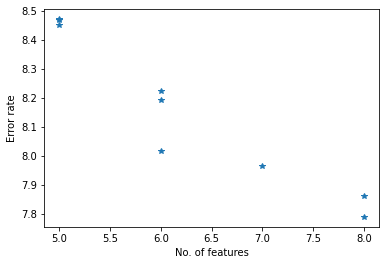

In [14]:
plot_archive(bgwo.archive)

In [15]:
bgwo.alpha

0.1

In [16]:
for w in bgwo.greyWolves:
  print(w.cost, w.position, w.dominated)

[8.         8.05796623] [1 1 0 0 1 1 1 0 1 1 1] False
[8.         8.70058155] [1 1 0 0 1 1 1 0 1 1 1] True
[7.         8.30049896] [1 0 0 0 1 1 1 0 1 1 1] False
[8.        8.2059288] [1 1 0 0 1 1 1 0 1 1 1] True
[8.         8.60043335] [1 1 0 0 1 1 1 0 1 1 1] True
[8.         8.65345478] [1 1 0 0 1 1 1 0 1 1 1] True
[8.         8.83996105] [1 1 0 0 1 1 1 0 1 1 1] True
[8.         8.29929447] [1 1 0 0 1 1 1 0 1 1 1] True


### Testing with all features

In [17]:
from ANN_Classifier_v2 import *

In [18]:
selected = np.ones(data.shape[1] - 1)
print(selected)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
ann_model = ANN(selected, data)
ann_model.train()

In [20]:
test_error = ann_model.test_error()
print(test_error)

15/15 [==============================] - 0s 1ms/step - loss: 8.5287 - mape: 8.5287
8.52873706817627


#### DataSet2

In [21]:
inFile2 = "/content/gdrive/My Drive/GWO/Dataset/UCI_DATA/HeartEW/HeartEW-final.csv"
data2 = pd.read_csv(inFile2)
data2 = data2.rename(columns={"quality": "target"})
data2.head

<bound method NDFrame.head of       0  1  2    3    4  5  6    7  8    9  10  11  12  target
0    34  1  1  118  182  0  2  174  0  0.0   1   0   3       1
1    53  1  4  140  203  1  2  155  1  3.1   3   0   7       2
2    61  1  1  134  234  0  0  145  0  2.6   2   2   3       2
3    68  1  3  118  277  0  0  151  0  1.0   1   1   7       1
4    54  1  4  122  286  0  2  116  1  3.2   2   2   3       2
..   .. .. ..  ...  ... .. ..  ... ..  ...  ..  ..  ..     ...
265  54  1  4  120  188  0  0  113  0  1.4   2   1   7       2
266  68  0  3  120  211  0  2  115  0  1.5   2   0   3       1
267  53  1  4  123  282  0  0   95  1  2.0   2   2   7       2
268  46  1  3  150  231  0  0  147  0  3.6   2   0   3       2
269  35  1  4  120  198  0  0  130  1  1.6   2   0   7       2

[270 rows x 14 columns]>

In [22]:
bgwo2 = BMOGWO(dataset=data2 , greyWolvesNum=8, archiveSize=30, maxIt= maxIter)

In [23]:
bgwo2.optimize()

3/3 [==============================] - 0s 5ms/step - loss: 19.5360 - mape: 19.5360
[1. 1.]
[1. 1.]
[1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8ea09950>
[1.]

Iteration: 0
alpha: [ 4.         17.07978058]
beta: [ 5.         15.37438488]
delta: [ 5.         15.37438488]
3/3 [==============================] - 0s 4ms/step - loss: 16.4912 - mape: 16.4912
[1. 1.]
[1. 1.]
[1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8ea09950>
[1.]

Iteration: 1
alpha: [ 5.         15.37438488]
beta: [ 4.        16.4911747]
delta: [ 4.        16.4911747]
3/3 [==============================] - 0s 5ms/step - loss: 27.5579 - mape: 27.5579
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8ea09950>
[1. 1.]

Iteration: 2
alpha: [ 4.         15.67311573]
beta: [ 5.         15.37438488]
delta: [ 4.         15.67311573]
3/3 [==============================] - 0s 8ms/step - loss: 17.2110 - mape: 17.2110
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f

In [24]:
for nonD in bgwo2.archive:
  print(nonD.cost, nonD.position)

[ 2.         14.08726406] [0 0 0 0 0 0 0 0 0 0 1 0 1]
[ 2.         13.82283974] [0 0 0 0 0 0 0 0 0 0 1 0 1]
[ 2.         13.65596962] [0 0 0 0 0 0 0 0 0 0 1 0 1]
[ 2.         17.48559952] [0 0 0 0 0 0 0 0 0 0 1 0 1]
[ 3.         13.83990383] [0 0 0 0 0 0 1 0 0 0 1 0 1]
[ 2.         15.88084602] [0 0 0 0 0 0 0 0 0 0 1 0 1]
[ 2.         14.26797581] [0 0 0 0 0 0 0 0 0 0 1 0 1]


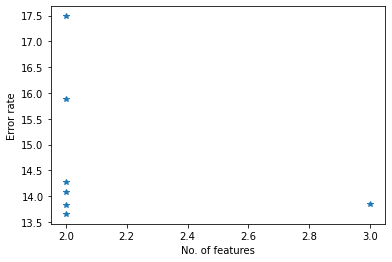

In [25]:
plot_archive(bgwo2.archive)

#### Dataset 3

In [26]:
inFile3 = "/content/gdrive/My Drive/GWO/Dataset/UCI_DATA/BreastEW/BreastEW-final.csv"
data3 = pd.read_csv(inFile3)
data3 = data3.rename(columns={"quality": "target"})
data3.head

<bound method NDFrame.head of          0      1       2       3  ...       27      28       29  target
0    13.44  21.58   86.18   563.0  ...  0.11120  0.2994  0.07146       1
1    10.49  18.61   66.86   334.3  ...  0.06528  0.2213  0.07842       2
2    10.96  17.62   70.79   365.6  ...  0.09861  0.2289  0.08278       2
3    13.81  23.75   91.56   597.8  ...  0.20130  0.4432  0.10860       1
4    16.46  20.11  109.30   832.9  ...  0.20350  0.3054  0.09519       1
..     ...    ...     ...     ...  ...      ...     ...      ...     ...
563  13.28  20.28   87.32   545.2  ...  0.14920  0.3739  0.10270       1
564  15.28  22.41   98.92   710.6  ...  0.12260  0.3175  0.09772       1
565  24.63  21.60  165.50  1841.0  ...  0.24750  0.3157  0.09671       1
566  14.86  16.94   94.89   673.7  ...  0.07971  0.2525  0.06827       2
567  11.90  14.65   78.11   432.8  ...  0.06042  0.2727  0.10360       2

[568 rows x 31 columns]>

In [27]:
bgwo3 = BMOGWO(dataset = data3, greyWolvesNum=8, archiveSize=30, maxIt= maxIter)

In [28]:
bgwo3.optimize()

6/6 [==============================] - 0s 2ms/step - loss: 7.2782 - mape: 7.2782
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c84cf75d0>
[1. 1.]

Iteration: 0
alpha: [12.          5.72918844]
beta: [14.          2.80804539]
delta: [14.          2.80804539]
6/6 [==============================] - 0s 3ms/step - loss: 3.7531 - mape: 3.7531
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c84cf75d0>
[1. 1.]

Iteration: 1
alpha: [12.          5.72918844]
beta: [10.          7.15848637]
delta: [10.          7.15848637]
6/6 [==============================] - 0s 3ms/step - loss: 6.5741 - mape: 6.5741
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c84cf75d0>
[1. 1.]

Iteration: 2
alpha: [13.          2.29241967]
beta: [10.          7.15848637]
delta: [12.          5.72918844]
6/6 [==============================] - 0s 3ms/step - loss: 5.2218 - mape: 5.2218
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
Archive [<Gre

In [29]:
for nonD in bgwo3.archive:
  print(nonD.cost, nonD.position)

[8.         2.40027761] [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0]
[9.        2.2327354] [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0]
[9.         2.08001256] [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0]
[11.          1.39806437] [0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1]
[11.          1.67883635] [0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0]
[9.         1.13508821] [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0]
[10.          2.36533546] [0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0]
[9.        2.4134419] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1]
[10.          1.71250534] [0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1]
[8.         3.53269339] [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0]
[7.       3.331429] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0]


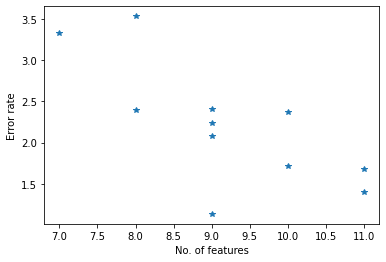

In [30]:
plot_archive(bgwo3.archive)

#### Dataset 4

In [31]:
inFile4 = "/content/gdrive/My Drive/GWO/Dataset/UCI_DATA/Ionosphere/Ionosphere-final.csv"
data4 = pd.read_csv(inFile4)
data4 = data4.rename(columns={"quality": "target"})
data4.head

<bound method NDFrame.head of      0  1        2        3  ...       31       32       33  target
0    1  0  0.99539 -0.05889  ... -0.54487  0.18641 -0.45300       1
1    1  0  1.00000 -0.18829  ... -0.06288 -0.13738 -0.02447       2
2    1  0  1.00000 -0.03365  ... -0.24180  0.56045 -0.38238       1
3    1  0  1.00000 -0.45161  ...  1.00000 -0.32382  1.00000       2
4    1  0  1.00000 -0.02401  ... -0.59573 -0.04608 -0.65697       1
..  .. ..      ...      ...  ...      ...      ...      ...     ...
346  1  0  0.83508  0.08298  ... -0.10714  0.90546 -0.04307       1
347  1  0  0.95113  0.00419  ... -0.00035  0.91483  0.04712       1
348  1  0  0.94701 -0.00034  ...  0.00442  0.92697 -0.00577       1
349  1  0  0.90608 -0.01657  ... -0.03757  0.87403 -0.16243       1
350  1  0  0.84710  0.13533  ... -0.06678  0.85764 -0.06151       1

[351 rows x 35 columns]>

In [32]:
bgwo4 = BMOGWO(dataset=data4, greyWolvesNum=8, archiveSize=30, maxIt= maxIter)

In [33]:
bgwo4.optimize()

4/4 [==============================] - 0s 3ms/step - loss: 13.4115 - mape: 13.4115
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8794fa10>
[1. 1. 1. 1. 1.]
[1. 1. 1. 1.]

Iteration: 0
alpha: [20.          9.24920559]
beta: [15.         10.06369305]
delta: [18.          9.52292156]
4/4 [==============================] - 0s 3ms/step - loss: 11.7543 - mape: 11.7543
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8e6c0810>
[1. 1. 1. 1. 1.]
[1. 1. 1. 1.]

Iteration: 1
alpha: [14.         10.67615986]
beta: [20.          9.06536674]
delta: [18.          9.52292156]
4/4 [==============================] - 0s 3ms/step - loss: 10.6336 - mape: 10.6336
[1. 1. 1. 1. 2. 1. 1.]
[1. 1. 1. 1. 2. 1. 1.]
[1. 1. 1. 1. 2. 1. 1.]
Archive [<GreyWolf.GreyWolf object at 0x7f3c8e2fec10>
[1. 1. 1. 2. 1. 1.]
[1. 1. 2. 1. 1.]

Iteration: 2
alpha: [13.         11.83181381]
beta: [15.         10.06369305

In [34]:
for nonD in bgwo4.archive:
  print(nonD.cost, nonD.position)

[12.          6.68347263] [1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
[12.         6.6944437] [1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0]
[16.          5.80303478] [1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1]
[10.          8.49802685] [1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
[12.          7.30563545] [1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
[14.          5.81071377] [1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0]
[10.          8.13619709] [1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
[10.          8.15521049] [1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0]
[14.          6.43987513] [1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0]
[11.          6.76769114] [1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
[10.          8.18009377] [1 0 0 0 1 0 0 1

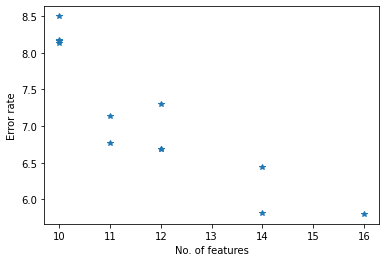

In [35]:
plot_archive(bgwo4.archive)